In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rating/ratings_small.csv
/kaggle/input/movies-data/tmdb_movies_data.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
#import data
movies= pd.read_csv("../input/movies-data/tmdb_movies_data.csv")
movies.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#extract data
movies["year"]=pd.DatetimeIndex(movies['release_date']).year
movies['release_month']=pd.DatetimeIndex(movies['release_date']).month

In [7]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2015,6
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2015,5
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,2015,3
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,2015,12
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,2015,4


In [8]:
unique_title= movies.drop_duplicates(['original_title'])
unique_title=unique_title["year"].value_counts()
unique_title.index

Int64Index([2014, 2013, 2015, 2012, 2011, 2009, 2008, 2010, 2007, 2006, 2005,
            2004, 2003, 2002, 2001, 2000, 1999, 1998, 1996, 1997, 1994, 1993,
            1995, 1988, 1989, 1991, 1992, 1990, 1987, 1986, 1985, 1984, 1983,
            1982, 1981, 1980, 1978, 1977, 1979, 1971, 1973, 1976, 1974, 1966,
            1964, 1975, 1970, 1967, 1968, 1972, 1965, 1969, 1963, 1962, 1961,
            1960],
           dtype='int64')

In [9]:
unique_title.head(10)

2014    698
2013    649
2015    629
2012    585
2011    532
2009    527
2008    493
2010    486
2007    423
2006    399
Name: year, dtype: int64

In [10]:
y=unique_title
x=unique_title.index

In [11]:
movies_month=movies[['original_title','release_month']]
movies_month.groupby(['release_month']).size()

release_month
1      919
2      691
3      823
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
dtype: int64

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [13]:
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
year                       0
release_month              0
dtype: int64

In [14]:
#cleaning data
movies.dropna(inplace=True)

In [15]:
movies.duplicated().sum()

0

In [16]:
movies.iloc[0].genres

'Action|Adventure|Science Fiction|Thriller'

In [17]:
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
v = CountVectorizer(max_features =5000, stop_words='english')

In [19]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2015,6
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2015,5
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,2015,3
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,2015,12
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,2015,4


In [20]:
vectors=v.fit_transform(movies['tagline']).toarray()

In [21]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
v.get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '05',
 '06',
 '09',
 '10',
 '100',
 '1000',
 '11th',
 '12',
 '13',
 '1350',
 '1408',
 '17',
 '170',
 '188',
 '1945',
 '1951',
 '1965',
 '1974',
 '1977',
 '1985',
 '1993',
 '1997',
 '20',
 '2002',
 '2006',
 '2009',
 '2019',
 '2042',
 '21',
 '21st',
 '24',
 '26',
 '27',
 '29th',
 '30',
 '300',
 '375lbs',
 '391',
 '3d',
 '40',
 '47',
 '50',
 '500',
 '5th',
 '65',
 '70',
 '72',
 '7ft',
 '80s',
 '90',
 '911',
 'aaron',
 'abandon',
 'abby',
 'abduction',
 'absolutely',
 'academy',
 'accept',
 'accepted',
 'acclaimed',
 'accomplice',
 'account',
 'act',
 'acting',
 'action',
 'actors',
 'acts',
 'actually',
 'adapt',
 'adapted',
 'addicted',
 'adjusted',
 'admit',
 'adrift',
 'adult',
 'adulthood',
 'adults',
 'adventure',
 'adventures',
 'affair',
 'afghanistan',
 'afoot',
 'afraid',
 'afterlife',
 'agatha',
 'age',
 'agency',
 'agent',
 'agents',
 'aggravation',
 'agitated',
 'ago',
 'agree',
 'ahead',
 'ahhh',
 'ain',
 'air',
 'airborne',
 'akron',
 'aladdin',
 'alaska',
 

In [24]:
#Steming
import nltk
from nltk.stem.porter import PorterStemmer

In [25]:
ps=PorterStemmer()

In [26]:
def stem(text):
    li=[]
    for i in text.split():
        li.append(ps.stem(i))
    string=" ".join(li)
    return string

In [27]:
movies['tagline']=movies['tagline'].apply(stem)

In [28]:
#Computing Cosine Distance between vectors
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
similarity =cosine_similarity(vectors)

In [30]:
similarity[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [31]:
def recommend(movie):
    movie_index=movies[movies['original_title']==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)), reverse=True ,key=lambda x:x[1])[1:6]
    for i in movies_list:
         print(movies.iloc[i[0]].original_title)

In [32]:
#test
recommend('Avatar')

Family Guy Presents: Something, Something, Something, Dark Side
Hellboy
The Martian
Scouts Guide to the Zombie Apocalypse
The Hallow


In [33]:
import pickle

In [34]:
pickle.dump(movies.to_dict(),open('movies.pkl','wb'))

In [35]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [36]:
def recommend(movies):
    movies_index = movies[movies['original_title']==movies].index[0]
    distances=similarity[movies_index]
    movies_list=sorted(list(enumerate(distances)), reverse=True ,key=lambda x:x[1])[1:6]
    recommended=[]
    movies_posters=[]
    for i in movies_list:
        movies_id=movies.iloc[i[0]].movies_id
        recommended.append((movies.iloc[i[0]].original_title))
        movies_posters.append(get_posters(movies_id))
    return recommended,movies_posters

calculating final score ,40% of the score is the weight for weigthed average, 60% is the  weight for popularity(which we already got earlier) 

In [37]:
pip install tensorflow-recommenders

Note: you may need to restart the kernel to use updated packages.


In [38]:
import string
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_recommenders as tfrs
from collections import Counter
from typing import Dict, Text
from ast import literal_eval
from datetime import datetime
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
#warnings.filterwarnings('ignore')

2022-11-29 08:22:44.409556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 08:22:44.586486: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-11-29 08:22:44.586518: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-29 08:22:45.693692: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

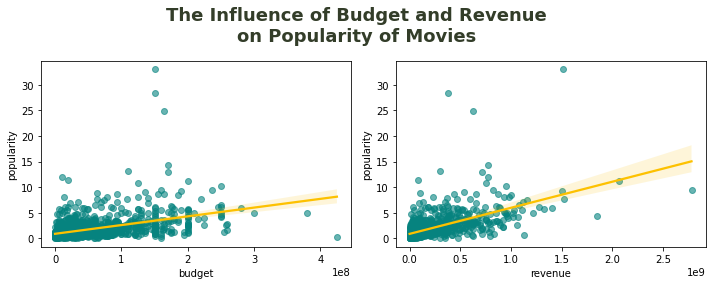

In [39]:
df_plot = movies[(movies['budget'] != 0) & (movies['revenue'] != 0)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('The Influence of Budget and Revenue\non Popularity of Movies', fontsize=18, weight=600, color='#333d29')
for i, col in enumerate(['budget', 'revenue']):
    sns.regplot(data=df_plot, x=col, y='popularity',
                scatter_kws={"color": "#06837f", "alpha": 0.6}, line_kws={"color": "#fdc100"}, ax=axes[i])

plt.tight_layout()

In [40]:
R = movies['vote_average']
v = movies['vote_count']
# We will only consider movies that have more votes than at least 80% of the movies in our dataset
m = movies['vote_count'].quantile(0.8)
C = movies['vote_average'].mean()

movies['weighted_average'] = (R*v + C*m)/(v+m)

In [41]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(movies[['popularity', 'weighted_average']])
weighted_df = pd.DataFrame(scaled, columns=['popularity', 'weighted_average'])

weighted_df.index = movies['original_title']

In [42]:
#formula of calculating score
weighted_df['score'] = weighted_df['weighted_average']*0.4 + weighted_df['popularity'].astype('float64')*0.6

In [43]:
weighted_df_sorted = weighted_df.sort_values(by='score', ascending=False)
weighted_df_sorted.head(10)

,popularity,weighted_average,score
original_title,,,
Interstellar,0.756356,0.951319,0.834341
Jurassic World,1.000000,0.487273,0.794909
Mad Max: Fury Road,0.861579,0.672318,0.785875
Guardians of the Galaxy,0.433849,0.910028,0.624321
Star Wars,0.364931,0.890612,0.575204
The Dark Knight,0.256662,1.000000,0.553997
Captain America: The Winter Soldier,0.393220,0.792693,0.553009
Fight Club,0.271252,0.974859,0.552695
Inception,0.283856,0.944231,0.548006


In [44]:
hybrid_df = movies[['original_title', 'genres', 'overview', 'production_companies', 'tagline', 'keywords']]

In [45]:
def separate(text):
    clean_text = []
    for t in text.split(','):
        cleaned = re.sub('\(.*\)', '', t) # Remove text inside parentheses
        cleaned = cleaned.translate(str.maketrans('','', string.digits))
        cleaned = cleaned.replace(' ', '')
        cleaned = cleaned.translate(str.maketrans('','', string.punctuation)).lower()
        clean_text.append(cleaned)
    return ' '.join(clean_text)

def remove_punc(text):
    cleaned = text.translate(str.maketrans('','', string.punctuation)).lower()
    clean_text = cleaned.translate(str.maketrans('','', string.digits))
    return clean_text

In [46]:

hybrid_df['genres'] = hybrid_df['genres'].apply(remove_punc)
hybrid_df['overview'] = hybrid_df['overview'].apply(remove_punc)
hybrid_df['production_companies'] = hybrid_df['production_companies'].apply(separate)
hybrid_df['tagline'] = hybrid_df['tagline'].apply(remove_punc)
hybrid_df['keywords'] = hybrid_df['keywords'].apply(separate)


hybrid_df['bag_of_words'] = ''
hybrid_df['bag_of_words'] = hybrid_df[hybrid_df.columns[1:]].apply(lambda x: ' '.join(x), axis=1)
hybrid_df.set_index('original_title', inplace=True)

hybrid_df = hybrid_df[['bag_of_words']]
hybrid_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,bag_of_words
original_title,
Jurassic World,actionadventurescience fictionthriller twentyt...
Mad Max: Fury Road,actionadventurescience fictionthriller an apoc...
Insurgent,adventurescience fictionthriller beatrice prio...
Star Wars: The Force Awakens,actionadventurescience fictionfantasy thirty y...
Furious 7,actioncrimethriller deckard shaw seeks revenge...


In [47]:
#due to the limit of memory, we only calculate the first 1000 movies
hybrid_df = weighted_df_sorted[:10000].merge(hybrid_df, left_index=True, right_index=True, how='left')

tfidf = TfidfVectorizer(stop_words='english', min_df=5)
tfidf_matrix = tfidf.fit_transform(hybrid_df['bag_of_words'])
tfidf_matrix.shape

(2016, 2734)

In [48]:
cos_sim = cosine_similarity(tfidf_matrix)
cos_sim.shape

(2016, 2016)

In [49]:
def predict(title, similarity_weight=0.7, top_n=10):
    data = hybrid_df.reset_index()
    index_movie = data[data['original_title'] == title].index
    similarity = cos_sim[index_movie].T
    
    sim_df = pd.DataFrame(similarity, columns=['similarity'])
    final_df = pd.concat([data, sim_df], axis=1)
    # You can also play around with the number
    final_df['final_score'] = final_df['score']*(1-similarity_weight) + final_df['similarity']*similarity_weight
    
    final_df_sorted = final_df.sort_values(by='final_score', ascending=False).head(top_n)
    final_df_sorted.set_index('original_title', inplace=True)
    return final_df_sorted[['score', 'similarity', 'final_score']]

In [50]:
#test
predict('Avatar', similarity_weight=0.7, top_n=10)

,score,similarity,final_score
original_title,,,
Avatar,0.444695,1.000000,0.833408
Mad Max: Fury Road,0.785875,0.044196,0.266700
Interstellar,0.834341,0.021414,0.265292
Jurassic World,0.794909,0.015857,0.249573
Apollo 18,0.141295,0.258012,0.222997
The Matrix,0.496332,0.105483,0.222738
X-Men: Days of Future Past,0.428430,0.105732,0.202541
A Grand Day Out,0.181046,0.207337,0.199450
Iron Man 3,0.335617,0.130632,0.192128


In [51]:
 hybrid_df.to_csv('hybrid_df.csv')

In [52]:
movies['id'] = movies['id'].astype('int64')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,release_month,weighted_average
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,the park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2015,6,6.452988
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,what a love day.,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2015,5,6.976985
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,one choic can destroy you,...,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,2015,3,6.266303
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,everi gener ha a story.,...,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,2015,12,7.298354
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,vengeanc hit home,...,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,2015,4,7.025979


In [59]:
#user_based recommener system using TensorFlow Recommenders which is built in Tensorflow 
import pickle
pickle.dump(tfidf_matrix, open('cosine_similarity.pkl', 'wb'))
ratings_df= pd.read_csv("../input/rating/ratings_small.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [60]:
ratings_df['date'] = ratings_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
ratings_df.drop('timestamp', axis=1, inplace=True)
ratings_df = ratings_df.merge(movies[['id', 'original_title', 'genres', 'overview']], left_on='movieId',right_on='id', how='left')
ratings_df = ratings_df[~ratings_df['id'].isna()]
ratings_df.drop('id', axis=1, inplace=True)
ratings_df.reset_index(drop=True, inplace=True)

ratings_df.head()

,userId,movieId,rating,date,original_title,genres,overview
0,2,17,5.0,1996-06-21 11:14:41,The Dark,Horror|Thriller|Mystery,AdÃ¨le and her daughter Sarah are traveling on...
1,2,161,3.0,1996-06-21 11:11:33,Ocean's Eleven,Thriller|Crime,"Less than 24 hours into his parole, charismati..."
2,2,165,3.0,1996-06-21 11:10:41,Back to the Future Part II,Adventure|Comedy|Family|Science Fiction|Action,Marty and Doc are at it again in this wacky se...
3,2,253,4.0,1996-06-21 11:11:51,Live and Let Die,Adventure|Action|Thriller,James Bond must investigate a mysterious murde...
4,2,272,3.0,1996-06-21 11:16:07,Batman Begins,Action|Crime|Drama,"Driven by tragedy, billionaire Bruce Wayne ded..."


In [61]:
movies_df = movies[['id', 'original_title']]
movies_df.rename(columns={'id':'movieId'}, inplace=True)
movies_df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,movieId,original_title
0,135397,Jurassic World
1,76341,Mad Max: Fury Road
2,262500,Insurgent
3,140607,Star Wars: The Force Awakens
4,168259,Furious 7


In [62]:
ratings_df['userId'] = ratings_df['userId'].astype(str)

ratings = tf.data.Dataset.from_tensor_slices(dict(ratings_df[['userId', 'original_title', 'rating']]))
movies = tf.data.Dataset.from_tensor_slices(dict(movies_df[['original_title']]))

ratings = ratings.map(lambda x: {
    "original_title": x["original_title"],
    "userId": x["userId"],
    "rating": float(x["rating"])
})

movies = movies.map(lambda x: x["original_title"])

In [63]:
print('Total Data: {}'.format(len(ratings)))

tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = ratings.take(35_000)
test = ratings.skip(35_000).take(8_188)

Total Data: 6920


In [64]:
movie_titles = movies.batch(1_000)
user_ids = ratings.batch(1_000).map(lambda x: x["userId"])

unique_movie_titles = np.unique(np.concatenate(list(movie_titles)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

print('Unique Movies: {}'.format(len(unique_movie_titles)))
print('Unique users: {}'.format(len(unique_user_ids)))

Unique Movies: 1980
Unique users: 638


In [65]:
class MovieModel(tfrs.models.Model):

  def __init__(self, rating_weight: float, retrieval_weight: float) -> None:
    # We take the loss weights in the constructor: this allows us to instantiate
    # several model objects with different loss weights.

    super().__init__()

    embedding_dimension = 64

    # User and movie models.
    self.movie_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_movie_titles, mask_token=None),
      tf.keras.layers.Embedding(len(unique_movie_titles) + 1, embedding_dimension)
    ])
    self.user_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
    ])

    # A small model to take in user and movie embeddings and predict ratings.
    # We can make this as complicated as we want as long as we output a scalar
    # as our prediction.
    self.rating_model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1),
    ])

    # The tasks.
    self.rating_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()],
    )
    self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=movies.batch(128).map(self.movie_model)
        )
    )

    # The loss weights.
    self.rating_weight = rating_weight
    self.retrieval_weight = retrieval_weight

  def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
    # We pick out the user features and pass them into the user model.
    user_embeddings = self.user_model(features["userId"])
    # And pick out the movie features and pass them into the movie model.
    movie_embeddings = self.movie_model(features["original_title"])
    
    return (
        user_embeddings,
        movie_embeddings,
        # We apply the multi-layered rating model to a concatentation of
        # user and movie embeddings.
        self.rating_model(
            tf.concat([user_embeddings, movie_embeddings], axis=1)
        ),
    )

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:

    ratings = features.pop("rating")

    user_embeddings, movie_embeddings, rating_predictions = self(features)

    # We compute the loss for each task.
    rating_loss = self.rating_task(
        labels=ratings,
        predictions=rating_predictions,
    )
    retrieval_loss = self.retrieval_task(user_embeddings, movie_embeddings)

    # And combine them using the loss weights.
    return (self.rating_weight * rating_loss
            + self.retrieval_weight * retrieval_loss)

In [66]:
model = MovieModel(rating_weight=1.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

cached_train = train.shuffle(100_000).batch(1_000).cache()
cached_test = test.batch(1_000).cache()

model.fit(cached_train, epochs=3)

Epoch 1/3
7/7 [==============================] - 5s 203ms/step - root_mean_squared_error: 3.2087 - factorized_top_k/top_1_categorical_accuracy: 1.4451e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0097 - factorized_top_k/top_10_categorical_accuracy: 0.0384 - factorized_top_k/top_50_categorical_accuracy: 0.1460 - factorized_top_k/top_100_categorical_accuracy: 0.1965 - loss: 6750.6970 - regularization_loss: 0.0000e+00 - total_loss: 6750.6970
Epoch 2/3
7/7 [==============================] - 1s 200ms/step - root_mean_squared_error: 1.2547 - factorized_top_k/top_1_categorical_accuracy: 0.0038 - factorized_top_k/top_5_categorical_accuracy: 0.0842 - factorized_top_k/top_10_categorical_accuracy: 0.1819 - factorized_top_k/top_50_categorical_accuracy: 0.5288 - factorized_top_k/top_100_categorical_accuracy: 0.6499 - loss: 6551.3500 - regularization_loss: 0.0000e+00 - total_loss: 6551.3500
Epoch 3/3
7/7 [==============================] - 1s 195ms/step - root_mean_squared_error: 1.1339 - fac

In [67]:
def predict_movie(user, top_n=3):
    # Create a model that takes in raw query features, and
    index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
    # recommends movies out of the entire movies dataset.
    index.index_from_dataset(
      tf.data.Dataset.zip((movies.batch(100), movies.batch(100).map(model.movie_model)))
    )

    # Get recommendations.
    _, titles = index(tf.constant([str(user)]))
    
    print('Top {} recommendations for user {}:\n'.format(top_n, user))
    for i, title in enumerate(titles[0, :top_n].numpy()):
        print('{}. {}'.format(i+1, title.decode("utf-8")))

def predict_rating(user, movie):
    trained_movie_embeddings, trained_user_embeddings, predicted_rating = model({
          "userId": np.array([str(user)]),
          "original_title": np.array([movie])
      })
    print("Predicted rating for {}: {}".format(movie, predicted_rating.numpy()[0][0]))


In [68]:
#test
predict_movie(28941, 5)

Top 5 recommendations for user 28941:

1. Romeo + Juliet
2. The Thing
3. The Thing
4. Notes on a Scandal
5. Because I Said So


In [69]:
predict_rating(123,'Minions')

Predicted rating for Minions: 2.8937828540802


In [70]:
ratings_df[ratings_df['userId'] == '123']

,userId,movieId,rating,date,original_title,genres,overview
1307,123,2502,5.0,2001-07-01 20:59:01,The Bourne Supremacy,Action|Drama|Thriller,When a CIA operation to purchase classified Ru...
1308,123,2959,4.0,2001-07-01 20:57:18,License to Wed,Comedy,"Newly engaged, Ben and Sadie can't wait to sta..."


In [71]:
# Get meta data for predicted movie
index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
# recommends movies out of the entire movies dataset.
index.index_from_dataset(
  tf.data.Dataset.zip((movies.batch(100), movies.batch(100).map(model.movie_model)))
)

# Get recommendations.
_, titles = index(tf.constant(['123']))
pred_movies = pd.DataFrame({'original_title': [i.decode('utf-8') for i in titles[0,:5].numpy()]})

pred_df = pred_movies.merge(ratings_df[['original_title', 'genres', 'overview']], on='original_title', how='left')
pred_df = pred_df[~pred_df['original_title'].duplicated()]
pred_df.reset_index(drop=True, inplace=True)
pred_df.index = np.arange(1, len(pred_df)+1)

pred_df

,original_title,genres,overview
1,The Bourne Supremacy,Action|Drama|Thriller,When a CIA operation to purchase classified Ru...
2,License to Wed,Comedy,"Newly engaged, Ben and Sadie can't wait to sta..."
3,In Time,Action|Thriller|Science Fiction,In the not-too-distant future the aging gene h...
4,This Is 40,Comedy,"Pete and Debbie are both about to turn 40, the..."
5,Horrible Bosses,Comedy|Crime,"For Nick (Jason Bateman), Kurt (Jason Sudeikis..."
